## Load Model

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer
import joblib
import matplotlib.pyplot as plt

In [25]:
def show_values(axs, orient="v", space=.01):
    def _single(ax):
        if orient == "v":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() / 2
                _y = p.get_y() + p.get_height() + (p.get_height()*0.01)
                value = '{:.0f}'.format(p.get_height())
                ax.text(_x, _y, value, ha="center") 
        elif orient == "h":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() + float(space)
                _y = p.get_y() + p.get_height() - (p.get_height()*0.5)
                value = '{:.0f}'.format(p.get_width())
                ax.text(_x, _y, value, ha="left")

    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _single(ax)
    else:
        _single(axs)

## Load Model

In [2]:
rfModel = joblib.load('randomForestModel')

## Load Data

In [3]:
EUdata = pd.read_csv('EUCleaned.csv')

In [4]:
EUdataTest = EUdata[EUdata['clean_tweet'].notna()]

In [5]:
EUdataTest.shape

(2277, 8)

## Tfidf vectorizer

In [6]:
EUcorpus = []
for i in range(EUdataTest.shape[0]):
    EUcorpus.append(EUdataTest.iloc[i][3])

In [7]:
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(EUcorpus)
feature_names = vectorizer.get_feature_names()
dense = X.todense()
denselist = dense.tolist()
EUdf2 = pd.DataFrame(denselist, columns=feature_names)
EUdf2

,000,10,100,1000,1000x,101,105,10th,11,12,...,zeggen,zero,zerschnitten,zie,zien,zijn,zine,zizo,zo,zoom
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2272,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2273,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2274,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2275,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [8]:
EUPredict = rfModel.predict(EUdf2)

In [9]:
EUPredict

array([2, 2, 2, ..., 2, 2, 1])

In [10]:
EUdataFinal = EUdataTest[['text','retweet_count','favorite_count','Hash words','clean_tweet']]

In [11]:
EUdataFinal['indicator'] = EUPredict.tolist()

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [12]:
EUdataFinal

,text,retweet_count,favorite_count,Hash words,clean_tweet,indicator
0,Nothing to do w/current subject but my pet hat...,0,0,No hashtags,"noth w/current subject pet hate, 1 many, ppl i...",2
2,"@Brehbander Nee, dat valt best mee. Want juist...",0,1,No hashtags,"nee, dat valt best mee. want juist die casusse...",2
3,@hqt__ @hack___man @blackvoices It is sensatio...,0,0,No hashtags,it sensat sinc deni everi day. white hate crim...,2
4,@DannyHackett @bexleynews Hate is a crime now.,0,0,No hashtags,hate crime now.,2
5,@aisssssse ce fut un hate crime ducoup 😢😢 mais...,0,1,No hashtags,ce fut un hate crime ducoup mai au moin notr r...,2
...,...,...,...,...,...,...
2336,@RivkahBrown @Samfr @ING Question hun. Are you...,0,0,No hashtags,question hun. are clinic insan take drugs? cal...,2
2337,@michaeljswalker Scott Adkins interviews marti...,0,0,No hashtags,scott adkin interview martial art star said an...,2
2338,It is so brutally painful to want to make/eat ...,0,0,No hashtags,it brutal pain want make/eat asian food store ...,2
2339,Update: The black male suspect in the anti-Asi...,231,1583,No hashtags,update: the black male suspect anti-asian atta...,2


In [13]:
EUdataFinal['tweet_status'] = EUdataFinal.indicator.apply(lambda x : 'Neutral' if x == 2 else ('Offensive' if x == 1 else 'hate speech'))

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [14]:
EUdataFinal

,text,retweet_count,favorite_count,Hash words,clean_tweet,indicator,tweet_status
0,Nothing to do w/current subject but my pet hat...,0,0,No hashtags,"noth w/current subject pet hate, 1 many, ppl i...",2,Neutral
2,"@Brehbander Nee, dat valt best mee. Want juist...",0,1,No hashtags,"nee, dat valt best mee. want juist die casusse...",2,Neutral
3,@hqt__ @hack___man @blackvoices It is sensatio...,0,0,No hashtags,it sensat sinc deni everi day. white hate crim...,2,Neutral
4,@DannyHackett @bexleynews Hate is a crime now.,0,0,No hashtags,hate crime now.,2,Neutral
5,@aisssssse ce fut un hate crime ducoup 😢😢 mais...,0,1,No hashtags,ce fut un hate crime ducoup mai au moin notr r...,2,Neutral
...,...,...,...,...,...,...,...
2336,@RivkahBrown @Samfr @ING Question hun. Are you...,0,0,No hashtags,question hun. are clinic insan take drugs? cal...,2,Neutral
2337,@michaeljswalker Scott Adkins interviews marti...,0,0,No hashtags,scott adkin interview martial art star said an...,2,Neutral
2338,It is so brutally painful to want to make/eat ...,0,0,No hashtags,it brutal pain want make/eat asian food store ...,2,Neutral
2339,Update: The black male suspect in the anti-Asi...,231,1583,No hashtags,update: the black male suspect anti-asian atta...,2,Neutral


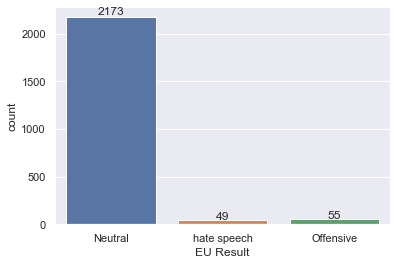

In [26]:
sns.set_theme(style="darkgrid")

ax = sns.countplot(x="tweet_status", data=EUdataFinal)
ax.set(xlabel='EU Result')
show_values(ax)

In [16]:
pd.options.display.max_colwidth = 500

EUdataFinaloffensive = EUdataFinal['text'].loc[EUdataFinal['tweet_status'] == 'offensive']

In [17]:
EUdataFinaloffensive


Series([], Name: text, dtype: object)

In [18]:
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)
stopwords.add("RT")

print(type(STOPWORDS))

import random

def random_color_func(word=None, font_size=None, position=None,  orientation=None, font_path=None, random_state=None):
    h = 344
    s = int(100.0 * 255.0 / 255.0)
    l = int(100.0 * float(random_state.randint(60, 120)) / 255.0)
    return "hsl({}, {}%, {}%)".format(h, s, l)

<class 'set'>


In [19]:
wordcloud = WordCloud(
                          background_color='white',
                          stopwords=stopwords,
                          max_words=100,
                          max_font_size=60, 
                          random_state=42
                         ).generate(str(EUdataFinal.loc[EUdataFinal["tweet_status"]=="hate speech"].clean_tweet))

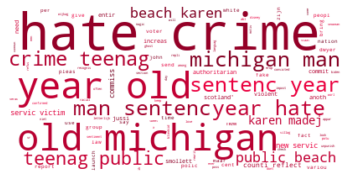

In [20]:
print(wordcloud)
fig = plt.figure(1)
plt.imshow(wordcloud.recolor(color_func= random_color_func, random_state=3),
           interpolation="bilinear")
plt.axis('off')
plt.show()

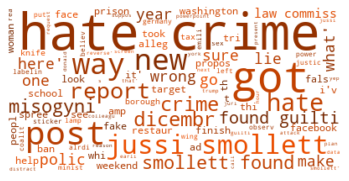

In [21]:
def random_color_func(word=None, font_size=None, position=None,  orientation=None, font_path=None, random_state=None):
    h = 20
    s = int(100.0 * 255.0 / 255.0)
    l = int(100.0 * float(random_state.randint(60, 120)) / 255.0)
    return "hsl({}, {}%, {}%)".format(h, s, l)

wordcloud = WordCloud(
                          background_color='white',
                          stopwords=stopwords,
                          max_words=100,
                          max_font_size=60, 
                          random_state=42
                         ).generate(str(EUdataFinal.loc[EUdataFinal["tweet_status"]=="Offensive"].clean_tweet))
print(wordcloud)
fig = plt.figure(1)
plt.imshow(wordcloud.recolor(color_func= random_color_func, random_state=3),
           interpolation="bilinear")
plt.axis('off')
plt.show()

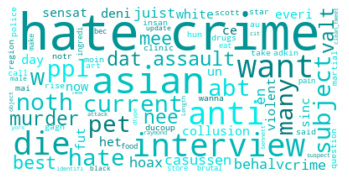

In [22]:
stopwords.add("Name")

def random_color_func(word=None, font_size=None, position=None,  orientation=None, font_path=None, random_state=None):
    h = 180
    s = int(100.0 * 255.0 / 255.0)
    l = int(100.0 * float(random_state.randint(60, 120)) / 255.0)
    return "hsl({}, {}%, {}%)".format(h, s, l)

wordcloud = WordCloud(
                          background_color='white',
                          stopwords=stopwords,
                          max_words=100,
                          max_font_size=60, 
                          random_state=42
                         ).generate(str(EUdataFinal.loc[EUdataFinal["tweet_status"]=="Neutral"].clean_tweet))
print(wordcloud)
fig = plt.figure(1)
plt.imshow(wordcloud.recolor(color_func= random_color_func, random_state=3),
           interpolation="bilinear")
plt.axis('off')
plt.show()

## More Analysis

### build a table with columns: 'tweet_status', 'retweet count', 'fav_count', 'tweet'

In [27]:
EUdataFinal.groupby('tweet_status').mean()

,retweet_count,favorite_count,indicator
tweet_status,,,
Neutral,3.844915,15.789231,2.0
Offensive,2.345455,9.600000,1.0
hate speech,1.938776,7.979592,0.0


In [28]:
EUdataFinaloffensive = EUdataFinal.loc[EUdataFinal['tweet_status'] == 'hate speech']

In [29]:
EUdataFinaloffensive.sort_values('favorite_count',ascending = False)

,text,retweet_count,favorite_count,Hash words,clean_tweet,indicator,tweet_status
1507,"The Commission have taken forward many of our long term calls, and in doing so have displayed commitment to ensure… https://t.co/nVqK6dcYRE",1,120,No hashtags,"the commiss taken forward mani long term calls, display commit ensure...",0,hate speech
86,"Apparently saying ""Our Day Will Come"" in a language that an entire section of a community refuse to recognise is no… https://t.co/JLjDa1h6tP",6,74,No hashtags,"appar say ""our day will come"" languag entir section commun refus recognis no...",0,hate speech
1809,"It is the latest authoritarian move by the Scottish National Party, which has dominated Scotland’s Parliament for a… https://t.co/6jImWVcQDl",27,56,No hashtags,"it latest authoritarian move scottish nation party, domin scotland' parliament a...",0,hate speech
1863,4. International law says that refugees may need to enter a country using irregular routes and should not be punish… https://t.co/I4A2wR4sWF,22,50,No hashtags,4. intern law say refuge may need enter countri use irregular rout punish...,0,hate speech
1142,"""It is surely time to think again about the entire concept of hate crime. Thousands of actual crimes are going unpu… https://t.co/4jgWlzdh6G",17,36,No hashtags,"""it sure time think entir concept hate crime. thousand actual crime go unpu...",0,hate speech
940,I have commissioned a new service for victims of hate crime in the county to reflect the 20% increase in incidents… https://t.co/VGlVUmbx3w,6,18,No hashtags,i commiss new servic victim hate crime counti reflect 20% increas incidents...,0,hate speech
699,"Jussie Smollett receives real convictions for fake crime, providing hate crime enthusiasts with the exception they… https://t.co/yn1SRjHquh",2,8,No hashtags,"jussi smollett receiv real convict fake crime, provid hate crime enthusiast except they...",0,hate speech
852,"We're supporting @WorcsCCC bowl hate out of sport 🏏\nA #HateCrime isn’t just physical violence, its online, verbal a… https://t.co/3oQcC08RrB",3,7,#HateCrime,"we'r support bowl hate sport a #hatecrim physic violence, online, verbal a...",0,hate speech
1682,the besties are stealing my thirst traps and adding fart noises for their own perverse sexual gratification and onc… https://t.co/MPMEZMST4Z,0,4,No hashtags,besti steal thirst trap ad fart nois pervers sexual gratif onc...,0,hate speech
1739,Pleased to have contributed case studies to this report on poor police practices when dealing with disabled victims… https://t.co/TvnSnjTjtE,2,2,No hashtags,pleas contribut case studi report poor polic practic deal disabl victims...,0,hate speech


In [30]:
EUdataFinaloffensive = EUdataFinal.loc[EUdataFinal['tweet_status'] == 'Offensive']

EUdataFinaloffensive.sort_values('favorite_count',ascending = False)

,text,retweet_count,favorite_count,Hash words,clean_tweet,indicator,tweet_status
2040,@Telegraph Pointless and unenforceable legislation will achieve nothing. If only there was some other way like cla… https://t.co/rpFCq5hau0,1,120,No hashtags,pointless unenforc legisl achiev nothing. if way like cla...,1,Offensive
569,"WASHINGTON, DC—Tweets from @JoeBiden and @KamalaHarris remain posted, even after Jussie Smollett is found guilty on… https://t.co/rc4MOmF3Su",37,95,No hashtags,"washington, dc--tweet remain posted, even jussi smollett found guilti on...",1,Offensive
2106,The new offence of public sexual harassment is seen as a more effective way of protecting women against violence th… https://t.co/oj5Ov5D46D,32,85,No hashtags,the new offenc public sexual harass seen effect way protect woman violenc th...,1,Offensive
2017,"The death of baby Arthur, the huge increase in children killing each other, spiralling knife crime, angry knucklehe… https://t.co/QIgAYOxggm",13,44,No hashtags,"the death babi arthur, huge increas child kill other, spiral knife crime, angri knucklehe...",1,Offensive
349,"I got this screen. And this is one reason, why i hate #bnwo #blacked #blm #tolerance #rapefugees.\nWhat's wrong with… https://t.co/t1vUh7wc7S",6,22,#bnwo #blacked #blm #tolerance #rapefugees.,"i got screen. and one reason, hate #bnwo #black #blm #toler #rapefugees. what' wrong with...",1,Offensive
97,Emily has got the weekend to finish her PowerPoint presentation on hate crime for school so I am going to help her… https://t.co/w84PHbX0n3,0,21,No hashtags,emili got weekend finish powerpoint present hate crime school i go help her...,1,Offensive
1484,"As the Law Commission rejects proposals to make misogyny a category of hate crime, here's a post from earlier in th… https://t.co/4WhBeedhZa",12,16,No hashtags,"as law commiss reject propos make misogyni categori hate crime, here' post earlier th...",1,Offensive
261,"Yep, that’s me about an hour after we got the news about the supposed attack on Jussie Smollett where, as you can s… https://t.co/0sXqIpvKjh",0,15,No hashtags,"yep, that' hour got news suppos attack jussi smollett where, s...",1,Offensive
456,The man wanted attention and now he has it. Why are people upset? He got caught like a rat on the highway. \n\nWhy ar… https://t.co/hyhTkDfJC0,4,15,No hashtags,the man want attent it. whi peopl upset? he got caught like rat highway. whi ar...,1,Offensive
2195,"@Takethatjoe @darrengrimes_ After spending his morning posting targeted sneers and insults at others, Grimes, speak… https://t.co/bauFVYjatk",1,11,No hashtags,"after spend morn post target sneer insult others, grimes, speak...",1,Offensive


### qualitative analysis

pip install text2emotion

In [31]:
EUdataFinal.reset_index(inplace = True)

In [32]:
import text2emotion as t2e

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/Merlin/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /Users/Merlin/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/Merlin/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [33]:
emoList = []

for i in range(EUdataFinal.shape[0]):
    emoDict = t2e.get_emotion(EUdataFinal['clean_tweet'][i])
    emoList.append(emoDict)

In [34]:
EUdataFinal['emotion'] = emoList

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [35]:
EUdataFinalWithEmo = pd.concat([EUdataFinal, pd.DataFrame(list(EUdataFinal['emotion']))], axis=1)

In [36]:
EUdataEmo = EUdataFinalWithEmo

In [37]:
EUdataEmo = EUdataEmo.melt(id_vars = 
               EUdataFinalWithEmo.columns[0:8], 
               value_vars = EUdataFinalWithEmo.columns[9:15],
               var_name = 'emotion', 
               value_name = 'emotion_score').sort_values('index')

In [38]:
EUdataEmoPieChart = EUdataEmo.groupby('emotion')['emotion_score'].sum()

Text(0.5, 1.0, 'EU Attitudes Towards Racism and Hate Crime')

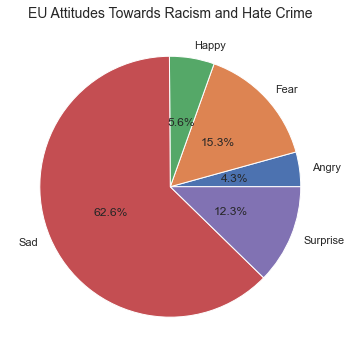

In [41]:
#Using matplotlib
pie, ax = plt.subplots(figsize=[10,6])
labels = EUdataEmoPieChart.keys()
plt.pie(x=EUdataEmoPieChart, autopct="%.1f%%",labels=labels, pctdistance=0.5)
plt.title("EU Attitudes Towards Racism and Hate Crime", fontsize=14)

In [48]:
NeutralEmo = EUdataEmo.loc[EUdataEmo['tweet_status'] == 'Neutral']

In [49]:
EmoPieChart_Neutral = NeutralEmo.groupby('emotion')['emotion_score'].sum()

Text(0.5, 1.0, 'EU Neutral Tweets Attitudes Towards Racism and Hate Crime')

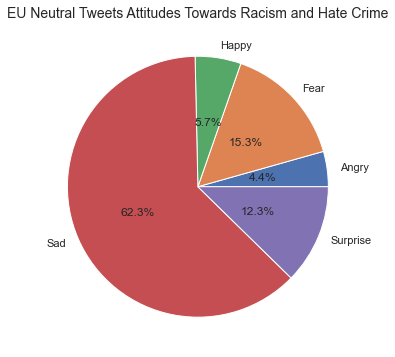

In [50]:
#Using matplotlib
pie, ax = plt.subplots(figsize=[10,6])
labels = EmoPieChart_Neutral.keys()
plt.pie(x=EmoPieChart_Neutral, autopct="%.1f%%",labels=labels, pctdistance=0.5)
plt.title("EU Neutral Tweets Attitudes Towards Racism and Hate Crime", fontsize=14)

In [51]:
OffensiveEmo = EUdataEmo.loc[EUdataEmo['tweet_status'] == 'Offensive']

In [52]:
EmoPieChart_Offensive = OffensiveEmo.groupby('emotion')['emotion_score'].sum()

Text(0.5, 1.0, 'EU Offensive Tweets Attitudes Towards Racism and Hate Crime')

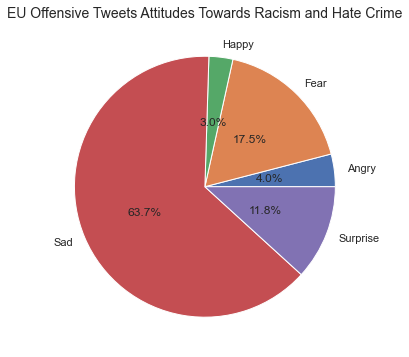

In [54]:
#Using matplotlib
pie, ax = plt.subplots(figsize=[10,6])
labels = EmoPieChart_Offensive.keys()
plt.pie(x=EmoPieChart_Offensive, autopct="%.1f%%",labels=labels, pctdistance=0.5)
plt.title("EU Offensive Tweets Attitudes Towards Racism and Hate Crime", fontsize=14)

In [55]:
hateEmo = EUdataEmo.loc[EUdataEmo['tweet_status'] == 'hate speech']

In [56]:
EmoPieChart_hate = hateEmo.groupby('emotion')['emotion_score'].sum()

Text(0.5, 1.0, 'EU Hate Tweets Attitudes Towards Racism and Hate Crime')

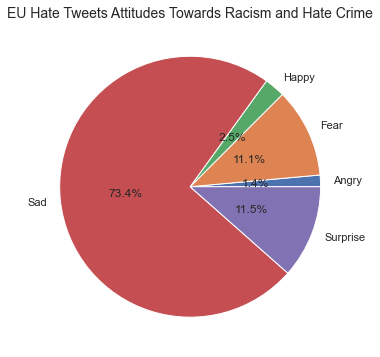

In [58]:
#Using matplotlib
pie, ax = plt.subplots(figsize=[10,6])
labels = EmoPieChart_hate.keys()
plt.pie(x=EmoPieChart_hate, autopct="%.1f%%",labels=labels, pctdistance=0.5)
plt.title("EU Hate Tweets Attitudes Towards Racism and Hate Crime", fontsize=14)